In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Leemos los datos que nos proporcionan

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AprendizajeAutomatico/data.csv', encoding="ISO-8859-1")

### Análisis exploratorio de datos y preprocesamiento

Mostramos los primeros datos para ver qué tenemos

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Imprimir información del DataFrame para comprender la estructura y los tipos de datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Imprimir estadísticas descriptivas para columnas numéricas del DataFrame

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Vamos a ver cuántas filas y columnas tenemos respectivamente

In [ ]:
data.shape

(541909, 8)

Veamos también qué columnas tenemos

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Convertir la columna 'InvoiceDate' a formato de fecha y hora utilizando el formato especificado

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M', errors="coerce")

Vamos a contar las ocurrencias de cada valor único en la columna 'Description'

In [ ]:
# Contamos las apariciones de cada valor único en la columna 'Description'
description_counts = data['Description'].value_counts()
description_counts

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

Vamos a verificar la presencia de valores faltantes en el conjunto de datos y mostrarlos en orden descendente.

In [ ]:
# Verificamos si faltan valores en el conjunto de datos y los mostramos en orden descendente
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

La imputación es importante porque eliminar las filas o columnas con valores faltantes puede resultar en pérdida de información valiosa y reducción del tamaño del conjunto de datos.

In [ ]:
data['Description'] = data['Description'].fillna('Unknown')
data['CustomerID']  = data['CustomerID'].fillna(0)

In [ ]:
#Volvemos a mostrar los valores nulos para ver si hemos conseguido que no haya valores nulos
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Verificamos duplicados
data.duplicated().sum()

5268

In [ ]:
# Eliminamos los registros duplicados encontrados

data.drop_duplicates(inplace = True)

In [ ]:
#Mostramos la forma que tienen ahora nuestros datos y efectivamente ya tenemos menos filas
data.shape

(536641, 8)

El precio evidentemente no puede ser negativo

In [ ]:
data[data['UnitPrice'] <0] #Mostramos las filas que tengan un precio negativo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.0,United Kingdom


In [ ]:
#Filtramos los datos data
data  = data[data['UnitPrice'] > 0]

In [ ]:
data[data['UnitPrice'] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Vemos que ya no tenemos elementos con precios negativos

In [ ]:
data[data['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


'C' es un aspecto crucial de la información: sugerir transacciones canceladas con devoluciones muestra negativos para la Cantidad

In [ ]:
len(data[data['InvoiceNo'].str.startswith('C')])

9251

In [ ]:
data['status'] = data['InvoiceNo'].apply(lambda x: 0 if str(x).startswith('C') else 1) # Columna transformadora
data['status'].value_counts()

1    524878
0      9251
Name: status, dtype: int64

In [ ]:
# Corregimos el formato para InvoiceNo

data['InvoiceNo'] = data.apply(lambda x: int(str(x['InvoiceNo'])[1:]) if (x['status'] == 0) else x['InvoiceNo'], axis=1)
data['InvoiceNo'].dtype

dtype('O')

In [ ]:
#Vemos qué tenemos ahora

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1


Contamos las ocurrencias de cada valor único en la columna 'StockCode'

In [ ]:
data['StockCode'].value_counts()

85123A    2295
22423     2187
85099B    2153
47566     1719
20725     1626
          ... 
90126C       1
22218        1
85031C       1
84743C       1
84387A       1
Name: StockCode, Length: 3938, dtype: int64

Este código verifica cuántas entradas en la columna 'StockCode' no son compuestas completamente por dígitos (es decir, contienen al menos un carácter que no es un dígito).

In [ ]:
(data['StockCode'].str.isdigit() == False).value_counts()

False    480270
True      53859
Name: StockCode, dtype: int64

Filtramos las filas del DataFrame data donde los códigos en la columna 'StockCode' no son completamente dígitos.

In [ ]:
data[(data['StockCode'].str.isdigit() == False)] # Los códigos que terminan con un alfabeto parecen informativos

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,1
...,...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany,1
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom,1
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom,1
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom,1


Mostramos cuántos caracteres numéricos contiene cada valor único en la columna 'StockCode' del DataFrame data. Luego, mostramos la frecuencia de la cantidad de caracteres numéricos en esos códigos.

In [ ]:
# Códigos que no son alfanuméricos

unique_stockcode = data['StockCode'].value_counts().index

digit_counts = [sum(char.isdigit() for char in str(value)) for value in unique_stockcode]
count_series = pd.Series(digit_counts)
count_series.value_counts()

5    3914
0      13
6       5
4       5
1       1
dtype: int64

Creamos una lista llamada keys_to_drop que contiene los códigos de stock únicos en la columna 'StockCode' del DataFrame data que tienen 0 o 1 caracteres numéricos.

In [ ]:
keys_to_drop = [key for key in unique_stockcode if sum(char.isdigit() for char in str(key)) in [0, 1]]
keys_to_drop

['POST',
 'DOT',
 'M',
 'C2',
 'D',
 'S',
 'BANK CHARGES',
 'AMAZONFEE',
 'CRUK',
 'DCGSSGIRL',
 'DCGSSBOY',
 'PADS',
 'm',
 'B']

Restablecemos los índices del DataFrame data y luego contamos la cantidad de filas en las que el valor de la columna 'StockCode' está en la lista keys_to_drop.

In [ ]:
data.reset_index(drop=True, inplace=True)
len(np.where(data['StockCode'].isin(keys_to_drop))[0])

2917

Eliminamos las filas del DataFrame data que tienen 'StockCode' en la lista keys_to_drop y luego mostramos la forma (número de filas y columnas) del DataFrame resultante.

In [ ]:
stock_codes_idx = np.where(data['StockCode'].isin(keys_to_drop))[0]

data = data.drop(labels=stock_codes_idx, axis=0)
data.shape

(531212, 9)

Mostramos las filas donde la columna 'Quantity' es igual a cero.

In [ ]:
data[data['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,status


Creamos un gráfico circular (pie chart) que visualiza la proporción de transacciones procesadas y canceladas en el DataFrame data.

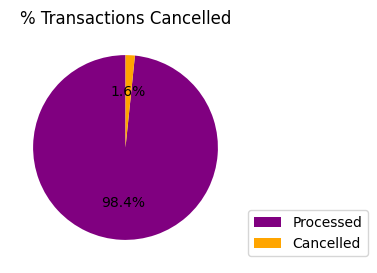

In [ ]:
# Gráfico para visualizar transacciones 'Canceladas'

counts_cancel_or_not = (data['Quantity'] >= 0).value_counts()

plt.figure(figsize=(5,3))
wedges, text, autotexts = plt.pie(counts_cancel_or_not, startangle=90, autopct='%1.1f%%', colors=['purple', 'orange'])
labels = ['Processed', 'Cancelled']
plt.legend(wedges, labels, loc='lower left', bbox_to_anchor=(1,0,0,1))
plt.title(f'% Transactions Cancelled')

plt.show()

Agrupamos los datos por mes y calculamos las ventas totales para cada mes.

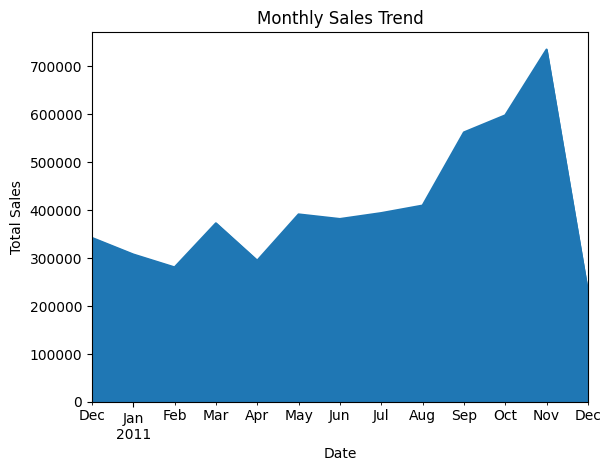

In [ ]:
# Agrupamos por mes y calculamos las ventas totales (suma de 'Cantidad') para cada mes
monthly_sales = data.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum()

# Trazamos la tendencia de ventas mensual utilizando un gráfico de área
monthly_sales.plot(kind='area', stacked=True)

# Establecemos el título del gráfico y las etiquetas de los ejes
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Mostramos el gráfico
plt.show()

Generamos un mapa de calor (heatmap) que muestra la matriz de correlación entre las variables numéricas en el DataFrame data.

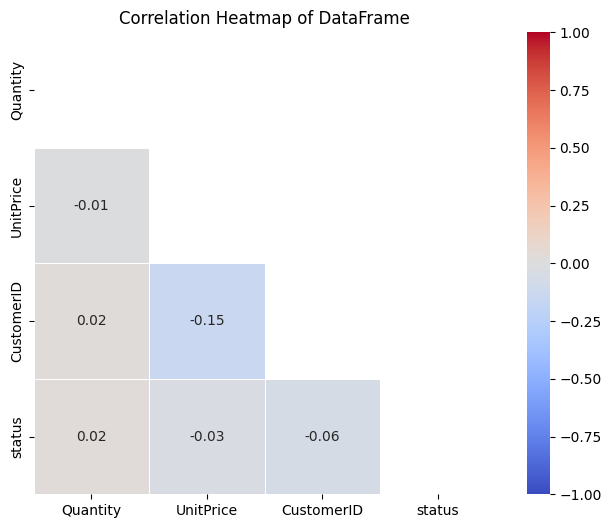

In [ ]:
import seaborn as sns

# Configuramos la figura matplotlib
plt.figure(figsize=(8, 6))

# Calculamos la matriz de correlación
corr = data.corr(numeric_only=True)

# Generamos una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuramos el mapa de calor marino con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f")

plt.title('Correlation Heatmap of DataFrame')
plt.show()

<ipython-input-353-09e72aab8e31>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ab = sns.barplot(x = 'Country' , y = 'Counts' ,data = country , palette ='coolwarm')


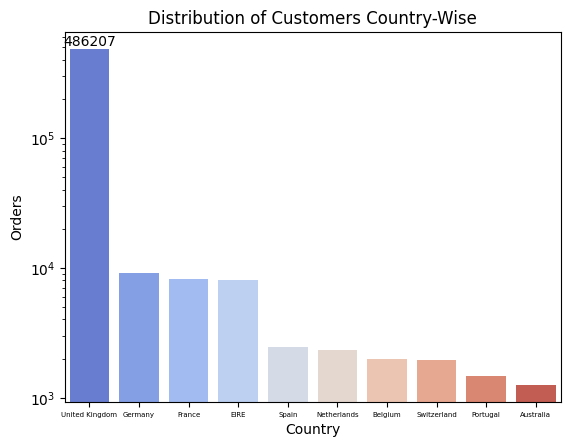

In [ ]:
#10 principales países según la frecuencia de aparición en la columna 'Country' del DataFrame
country = data['Country'].value_counts().reset_index(drop = False).head(10)
country.columns = ["Country","Counts"]
ab = sns.barplot(x = 'Country' , y = 'Counts' ,data = country , palette ='coolwarm')
ab.bar_label(ab.containers[0])
plt.title('Distribution of Customers Country-Wise')
plt.ylabel('Orders')
plt.xticks(fontsize = 5)
plt.yscale('log')

La codificación de variables categóricas como variables dummy

### Feature Engineering

Vemos qué columnas tenemos ahora

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'status'],
      dtype='object')

In [ ]:
#Vamos a eliminar las columnas que no nos van a aportar nada para realizar la predicción
data=data.drop(['Description','CustomerID','StockCode', 'InvoiceNo', 'status'], axis=1)

In [ ]:
#Vemos que se han eliminado correctamente
data.head()

,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01 08:26:00,2.55,United Kingdom
1,6,2010-12-01 08:26:00,3.39,United Kingdom
2,8,2010-12-01 08:26:00,2.75,United Kingdom
3,6,2010-12-01 08:26:00,3.39,United Kingdom
4,6,2010-12-01 08:26:00,3.39,United Kingdom


In [ ]:
# Convertimos la columna 'InvoiceDate' a formato de fecha y hora
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M', errors="coerce")

# Extraemos solo la parte de la fecha (ignorando las horas y minutos)
data['InvoiceDate'] = data['InvoiceDate'].dt.date

# Agrupamos por fecha y país, sumamos la cantidad y calculamos el precio promedio
data=data.groupby(['InvoiceDate']+['Country']).agg({'Quantity':'sum', 'UnitPrice': 'mean'}).reset_index()

data

,InvoiceDate,Country,Quantity,UnitPrice
0,2010-12-01,Australia,107,5.278571
1,2010-12-01,EIRE,242,4.182000
2,2010-12-01,France,446,1.962632
3,2010-12-01,Germany,116,2.707857
4,2010-12-01,Netherlands,96,1.850000
...,...,...,...,...
1682,2011-12-09,Belgium,202,1.076250
1683,2011-12-09,France,105,2.966667
1684,2011-12-09,Germany,872,2.654615
1685,2011-12-09,Norway,2227,2.378788


In [ ]:
data['Quantity'][1]

242

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding para la columna 'Country'
encoder = OneHotEncoder(sparse=False)
countries_encoded = encoder.fit_transform(data['Country'].values.reshape(-1, 1))

# Añadimos las columnas codificadas al DataFrame y eliminamos la columna original 'Country'
data = pd.concat([data.drop('Country', axis=1), pd.DataFrame(countries_encoded, columns=[f'Country_{i}' for i in range(countries_encoded.shape[1])])], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data.head()

,InvoiceDate,Quantity,UnitPrice,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,...,Country_28,Country_29,Country_30,Country_31,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37
0,2010-12-01,107,5.278571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-12-01,242,4.182000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-12-01,446,1.962632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-12-01,116,2.707857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-12-01,96,1.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Creamos secuencias diarias sin incluir la fecha en las características
sequences = []
labels = []
max_sequence_length = 0  # Para almacenar la longitud máxima de la secuencia

for date in data['InvoiceDate'].unique():
    daily_data = data[data['InvoiceDate'] == date]
    sequence = daily_data[['Quantity', 'UnitPrice'] + [f'Country_{i}' for i in range(countries_encoded.shape[1])]].values
    label = daily_data['Quantity'].sum()
    sequences.append(sequence)
    labels.append(label)

    # Actualizamos la longitud máxima de la secuencia
    max_sequence_length = max(max_sequence_length, sequence.shape[0])

# Rellenamos las secuencias más cortas con ceros para tener la misma longitud
sequences_padded = []
for sequence in sequences:
    pad_length = max_sequence_length - sequence.shape[0]
    padded_sequence = np.pad(sequence, ((0, pad_length), (0, 0)), 'constant', constant_values=0)
    sequences_padded.append(padded_sequence)

sequences = np.array(sequences_padded)
labels = np.array(labels)

In [ ]:
sequences.shape

(305, 13, 40)

- 305: Número de secuencias.
- 13: Longitud de cada secuencia.
- 40: Número de características en cada paso de tiempo.

### Diseño y entrenamiento del modelo

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(244, 13, 40)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Extraemos todas las características ('Quantity', 'UnitPrice', y las codificadas del país) de cada secuencia en el conjunto de entrenamiento
X_train = X_train[:, :, :]

# Extraemos todas las características ('Quantity', 'UnitPrice', y las codificadas del país) de cada secuencia en el conjunto de prueba
X_test = X_test[:, :, :]

# Normalizamos todas las características en el conjunto de entrenamiento
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

# Aplicamos la misma normalización a todas las características en el conjunto de prueba
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Asignamos los datos normalizados de vuelta a X_train y X_test
X_train[:, :, :] = X_train
X_test[:, :, :] = X_test

In [ ]:
X_train.shape

(244, 13, 40)

In [ ]:
y_train.shape

(244,)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

#Creamos el modelo
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D())
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dense(1))

In [ ]:
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 64)            7744      
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 128)            24704     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [ ]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [ ]:
# Entrenamos el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

Epoch 1/50
16/16 [==============================] - 4s 44ms/step - loss: 54533256.0000 - mse: 54533256.0000 - val_loss: 59938908.0000 - val_mse: 59938908.0000
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 48946996.0000 - mse: 48946996.0000 - val_loss: 56338020.0000 - val_mse: 56338020.0000
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 44700540.0000 - mse: 44700540.0000 - val_loss: 53717436.0000 - val_mse: 53717436.0000
Epoch 4/50
16/16 [==============================] - 0s 9ms/step - loss: 41517848.0000 - mse: 41517848.0000 - val_loss: 51164512.0000 - val_mse: 51164512.0000
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 39127876.0000 - mse: 39127876.0000 - val_loss: 48812816.0000 - val_mse: 48812816.0000
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 37409708.0000 - mse: 37409708.0000 - val_loss: 47191224.0000 - val_mse: 47191224.0000
Epoch 7/50
16/16 [==============================] -

### Evaluación del modelo y ajuste de hiperparámetros

In [ ]:
from sklearn.metrics import r2_score

# Evaluamos el modelo
eval_train = model.evaluate(X_train, y_train)
eval_test = model.evaluate(X_test, y_test)

# Extraemos el error cuadrático medio y otras métricas si es necesario
mse_tr, *_ = eval_train
mse_ts, *_ = eval_test

# Calculamos R^2
r2_tr = r2_score(y_train, model.predict(X_train).reshape(-1))
r2_ts = r2_score(y_test, model.predict(X_test).reshape(-1))

print('MSE train: %.2f' % mse_tr)
print('R^2 train: %.4f' % r2_tr)

print('MSE test: %.2f' % mse_ts)
print('R^2 test: %.4f' % r2_ts)

2/2 [==============================] - 0s 4ms/step
MSE train: 1529237.12
R^2 train: 0.9799
MSE test: 10304334.00
R^2 test: 0.8630


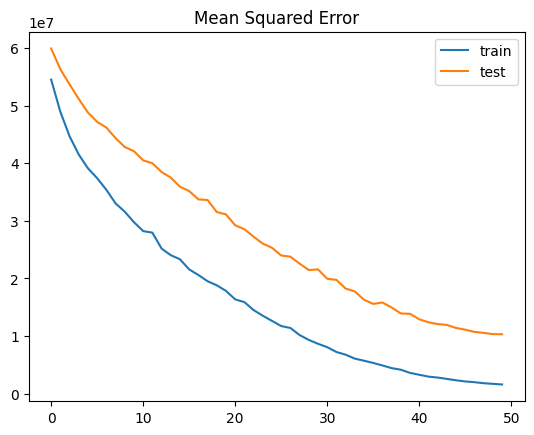

In [ ]:
# Plot de las métricas
plt.subplot()
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

Vemos que no hay overfitting porque siguen la misma tendencia los de prueba y los de test

In [ ]:
preds = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [ ]:
preds.shape

(61, 1)

Haremos el DataFrame result que se utilizará para comparar las predicciones del modelo con los valores reales

In [ ]:
result = pd.DataFrame(
    {
        'Actual':y_test,
        'Prediction':np.round(preds[:, 0]).astype(int)

    }
)

In [ ]:
result.head(10)

,Actual,Prediction
0,11014,11367
1,20211,21543
2,18207,17307
3,23906,27797
4,5207,4584
5,10499,7505
6,17266,16138
7,15676,18350
8,7192,7105
9,17219,20049


In [ ]:
result.tail()

,Actual,Prediction
56,8070,12987
57,15153,15579
58,41660,35165
59,15608,14073
60,10228,11146


Vemos que hace bastante buenas predicciones

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test,preds[:, 0])

0.8630307181167115

Un valor de R^2 de 0.863 es bastante positivo y sugiere que el modelo de regresión explica aproximadamente el 86,3% de la variabilidad en los datos observados.

Guardamos el modelo para posteriormente implementarlo de manera que pueda generar pronósticos en tiempo real para las ventas de camisetas de fútbol. Es decir, crearemos una API que pueda tomar los detalles de las camisetas de fútbol y devolver una predicción de ventas.

In [ ]:
model.save('/content/drive/MyDrive/AprendizajeAutomatico/football_sales_model.h5')